# Fake News Detection with Machine Learning


This project aims to build a machine learning model to classify news articles as **fake** or **real** based on their textual content. Using **Natural Language Processing (NLP)** and **Deep Learning**, we preprocess, analyze, and model the data to achieve accurate classification. Here’s a detailed look at how the project was completed and the technologies used in each phase.

---

## 1. Data Preparation

### Steps:
- **Data Concatenation**: Two datasets (`df_true` and `df_fake`) were combined into a single DataFrame (`df`) using **Pandas**, with each article's title and text merged into a single column called `original` for more cohesive analysis.


---

## 2. Data Cleaning and Preprocessing

### Steps:
- **Stopwords Removal**: We downloaded additional stopwords from **NLTK (Natural Language Toolkit)** to remove common but irrelevant words that could add noise to the model.
- **Custom Text Cleaning**: A function was created to tokenize and clean the text by removing short words and unwanted tokens.
- **Token Joining**: Cleaned tokens were joined back into a single string (`clean_joined`), making the data ready for input to the model.

### Technology:
- **NLTK**: Used for natural language text processing, especially useful in handling stopwords.
- **Gensim**: Utilized for efficient tokenization and simple text preprocessing.

---

## 3. Exploratory Data Analysis (EDA)

### Steps:
- **Word Count Analysis**: We counted the total number of words and unique words in the dataset to understand vocabulary size and text length variability.
- **Word Cloud Visualization**: **Matplotlib** and **WordCloud** libraries were used to visualize the most common words in real and fake news articles, providing insights into the vocabulary of each category.

### Technology:
- **Matplotlib**: A plotting library used to create various visualizations for data analysis.
- **WordCloud**: A Python package used to generate word clouds, helping to visualize word frequency.

---

## 4. Text Tokenization and Padding

### Steps:
- **Tokenization**: Using **Keras Tokenizer**, the `clean_joined` column was converted into sequences of integers, where each integer represents a word.
- **Train-Test Split**: The dataset was split into training and testing sets with **stratified sampling** to maintain a balanced distribution of fake and real news.
- **Sequence Padding**: We standardized the length of input sequences to 40 using **Keras pad_sequences**, making the data compatible with the neural network model.

### Technology:
- **Keras**: A deep learning library in Python that provides tools for text tokenization, padding, and neural network layers.
- **Scikit-learn**: Used for data splitting and stratification to ensure balanced class distributions in training and testing sets.

---

## 5. Model Construction

### Steps:
- **Embedding Layer**: An embedding layer was used to convert integer tokens into dense, continuous vector representations of specified dimensionality, helping the model capture semantic similarities between words.
- **Bidirectional LSTM**: A bidirectional LSTM layer was added to capture context in both forward and backward directions, essential for understanding the sequential nature of text.
- **Dense Layers**: The final part of the model includes dense layers, with a sigmoid output layer for binary classification.

### Technology:
- **Keras Sequential API**: Used to construct a sequential neural network model.
- **Embedding and LSTM Layers**: Specialized layers in Keras that help represent words as vectors and capture temporal dependencies in text.

---

## 6. Model Training and Evaluation

### Steps:
- **Training**: The model was trained over two epochs with a batch size of 64, using **10% of the training data** as a validation set to monitor performance.
- **Prediction and Thresholding**: After training, predictions were generated on the test set, and a threshold of 0.5 was used to classify the news as real (1) or fake (0).
- **Accuracy and Confusion Matrix**: Model accuracy was calculated, and a confusion matrix was created to analyze the number of true positives, true negatives, false positives, and false negatives.

### Technology:
- **Scikit-learn Metrics**: Used to calculate accuracy and generate the confusion matrix for evaluating model performance.
- **Seaborn**: A visualization library used to plot the confusion matrix as a heatmap.

---

## Summary of Technology Stack

- **Python Libraries**: Pandas, NLTK, Gensim, Scikit-learn, Matplotlib, Seaborn, and WordCloud.
- **Deep Learning**: Keras library, using Embedding and Bidirectional LSTM layers to build a robust text classification model.
- **Evaluation Tools**: Confusion matrix, accuracy score, and word cloud visualizations to monitor and interpret the model's performance.

---

### Conclusion
This project demonstrates how to process and analyze textual data to build a high-performing fake news classifier using deep learning. By combining data cleaning, exploratory data analysis, and a powerful LSTM model, the project effectively identifies real and fake news with high accuracy.


# TASK #1: UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE

In [1]:
!pip install --upgrade tensorflow-gpu==2.11

In [2]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# load the data
true_url = 'https://raw.githubusercontent.com/pandapanda3/Dataset_Machine_Learning/refs/heads/main/FakeNewsClassification/True.csv'
fake_url = 'https://raw.githubusercontent.com/pandapanda3/Dataset_Machine_Learning/refs/heads/main/FakeNewsClassification/Fake.csv'
df_true = pd.read_csv(true_url)
df_fake = pd.read_csv(fake_url)

MINI CHALLENGE #1:
- Indicate how many data samples do we have per class (i.e.: Fake and True)
- List how many Null element are present and the memory usage for each dataframe

In [5]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df_fake['isfake'] = 0
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [10]:
df.drop(columns = ['date'], inplace = True)

In [11]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [12]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# TASK #4: PERFORM DATA CLEANING

In [13]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# extending a list of stop words by adding additional words to it
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [15]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    # breaks down the input text into tokens (words) while converting them to lowercase.
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [16]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [17]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [18]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [19]:
df

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal..."


In [20]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [21]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [22]:
len(list_of_words)

9276947

In [23]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

108704

In [24]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [25]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


In [26]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

MINI CHALLENGE #2:
- Perform sanity check on the prepocessing stage by visualizing at least 3 sample news




In [28]:
df['clean_joined'][:3]

,clean_joined
0,budget fight looms republicans flip fiscal scr...
1,military accept transgender recruits monday pe...
2,senior republican senator mueller washington r...


# TASK #5: VISUALIZE CLEANED UP DATASET

In [29]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


<Axes: xlabel='count', ylabel='subject'>

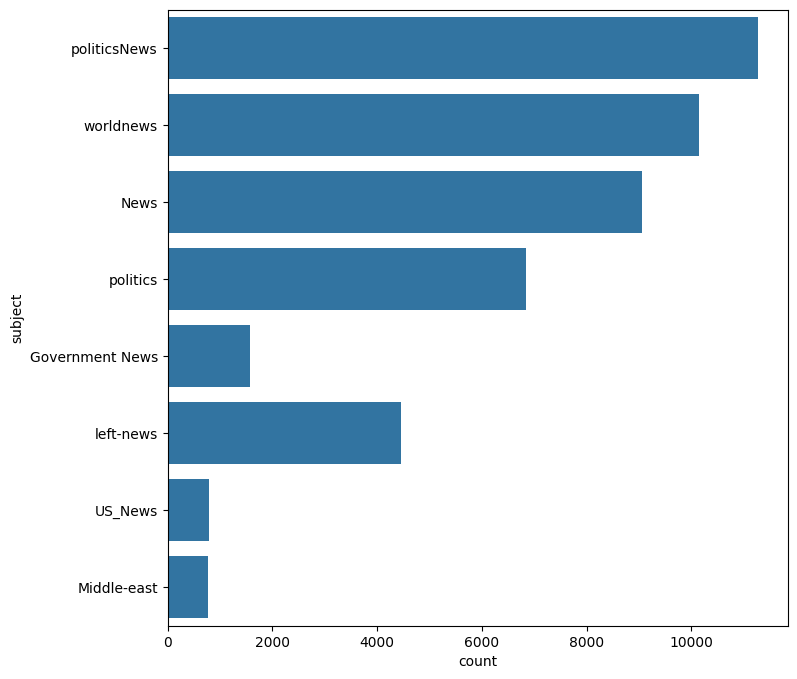

In [30]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

MINI CHALLENGE #3:
- Plot the count plot for fake vs. true news

<Axes: xlabel='count', ylabel='isfake'>

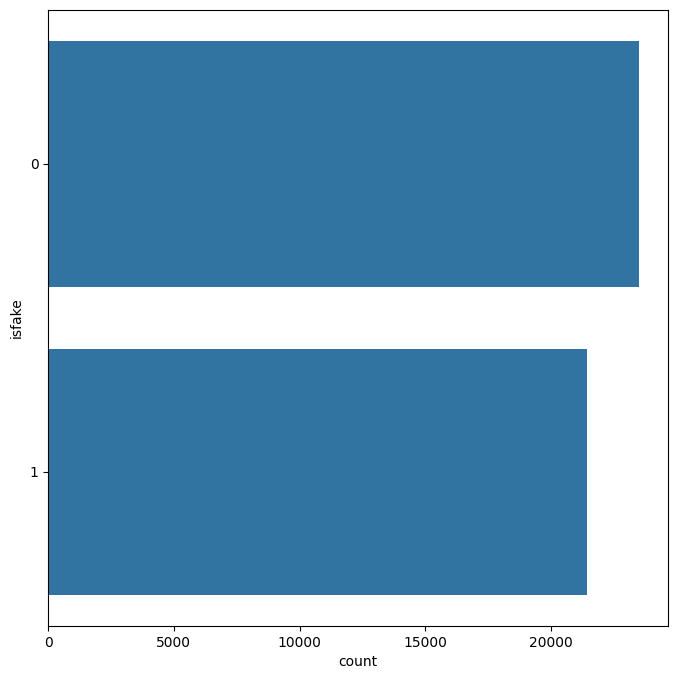

In [31]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

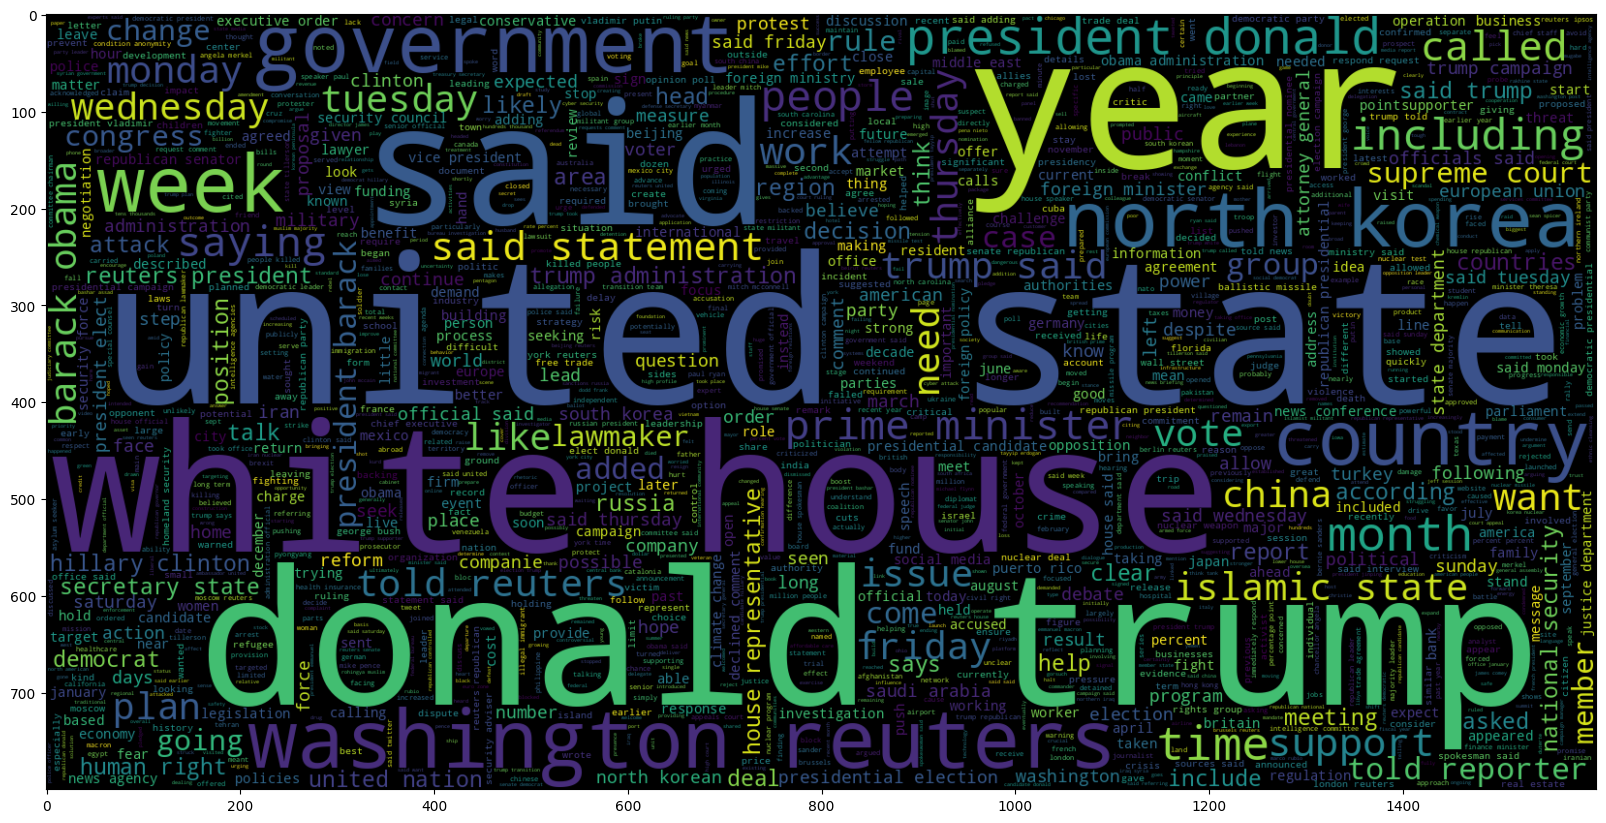

In [32]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

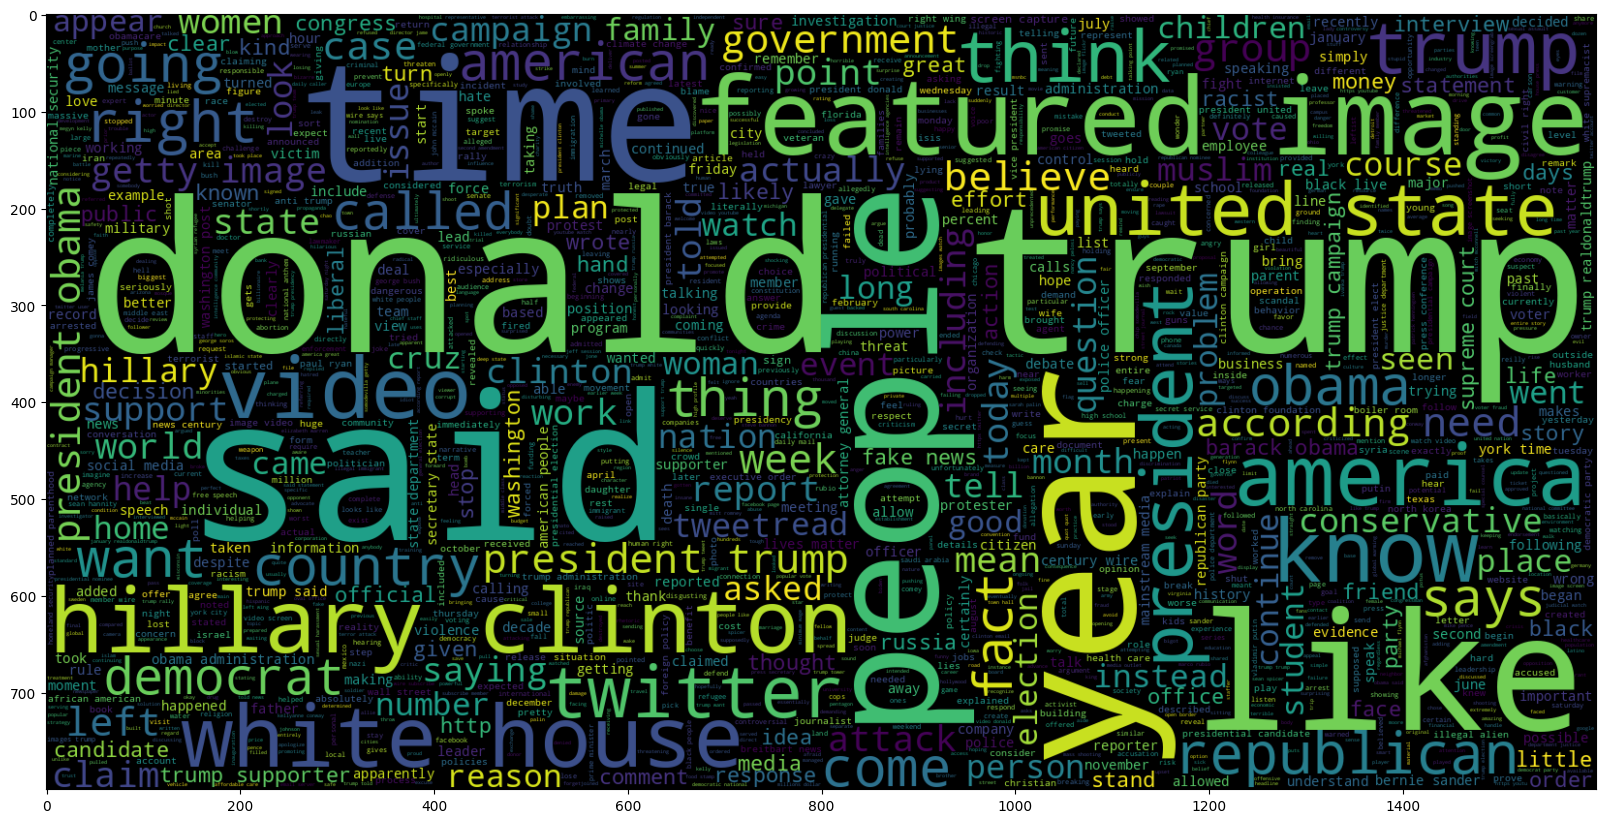

In [33]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [34]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [35]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

# TASK #6: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

## TOKENIZER

- **Tokenizer** allows us to vectorize a text corpus by turning each text into a sequence of integers.

### SENTENCE:
> "budget fight looms republicans flip fiscal script Washington Reuters head conservative republican faction congress voted month ..."

### TOKENS:
> `[3138, 3581, 2895, 27, 5354, 22457, 3505, 9, 3138, 35, 2895, 208, 213, 3581, 29, 71, 5354, 22457, 1275, 335, 2, 619, 2903, 27, 10461, 43213, 4908, ...]`


In [37]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, stratify=df.isfake, test_size = 0.2)

In [38]:
x_train.head(10)

,clean_joined
3342,gulf coast groups concerned trump picks lawyer...
16777,tillerson says saudi arabia ready talks qatar ...
39738,host recognize star spangled banner tells view...
2629,democrats congress urge review amazon foods de...
44378,boiler room unlikely alchemy tune alternate cu...
15329,british minister patel resigns test london reu...
32773,meet nasty women responsible promoting hate in...
5770,trump golf club million members judge reuters ...
6199,mexico says mexican officials meet washington ...
42114,global climate change liars ignore truth earth...


In [39]:
y_train.value_counts()

,count
isfake,
0,18785
1,17133


In [40]:
from nltk import word_tokenize

the tokenizer is only fitted on the training data (x_train) and not on the test data (x_test) to prevent data leakage.

During evaluation, if the test set contains words that were not in x_train, the tokenizer will handle them as **out-of-vocabulary (OOV) words**, which is a more realistic scenario. In production, the model will encounter new words, so it’s essential to evaluate performance on words learned only from training data.

In [41]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
# This step processes all the texts in x_train to count word frequencies, establishing the vocabulary and assigning a unique integer to each word.
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [42]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

## Padding

### Explanation of `padding='post'` and `truncating='post'` in `pad_sequences`

When using `pad_sequences` from Keras or TensorFlow, you have options to specify how padding and truncation should be applied to sequences. These parameters control where padding (additional tokens to reach a specified length) or truncation (removal of tokens to reduce length) is applied in each sequence.

#### `padding='post'`

- **Definition**: This option controls where padding tokens are added in each sequence when the sequence is shorter than the specified `maxlen`.
- **Behavior**: When `padding='post'`, padding is added **after** the end of the sequence.
- **Example**:
  - If `maxlen=5` and your sequence is `[1, 2, 3]`, then after padding with `padding='post'`, the sequence becomes `[1, 2, 3, 0, 0]`.

#### `truncating='post'`

- **Definition**: This option determines where tokens are removed in each sequence when the sequence is longer than the specified `maxlen`.
- **Behavior**: When `truncating='post'`, extra tokens are removed from the **end** of the sequence.
- **Example**:
  - If `maxlen=5` and your sequence is `[1, 2, 3, 4, 5, 6, 7]`, then after truncation with `truncating='post'`, the sequence becomes `[1, 2, 3, 4, 5]`.

## Why Use `post` for Both Padding and Truncating?
Using `post` for both `padding` and `truncating` keeps the start of each sequence intact, which can be important in NLP tasks where the beginning of a text often contains critical information. For example, in sentence classification, the start of a sentence may carry key information, so keeping it in place is beneficial.

Here’s an example usage:
```python
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Original sequences
sequences = [
    [1, 2, 3],
    [4, 5, 6, 7, 8],
    [9]
]

# Padding and truncating
padded_sequences = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
print(padded_sequences)
```
Output
```
[[1, 2, 3, 0, 0],
 [4, 5, 6, 7, 8],
 [9, 0, 0, 0, 0]]
```
In this example, shorter sequences are padded at the end, and longer sequences are truncated at the end.

In [43]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [44]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 2065  1850   147   830     1  4219   597   126    25     9     3    10
     1  4846  4654 12930  6144   123    66  1087   597   672   495  2065
  1850  1087   147   597   145   257  3219   257  4088  3941     1   845
  6144    77  1931   245]
The padded encoding for document 2  is :  [  555    46   282   618   841   218  2100  2065   299  7330     9   282
   618   841  1102   949   218  7330  2041   370   111   900   128 28787
  5472  2100    89     5   555     2   174   439  4049   508   841   365
   555     2  1870   209]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LSTM

## Recurrent Neural Networks (RNN): What Are They?

- **Feedforward Neural Networks** (vanilla networks) map a fixed-size input (like an image) to a fixed-size output (e.g., classes or probabilities). However, a limitation of feedforward networks is the lack of memory — they cannot handle time-dependent or sequential data effectively.
- **Recurrent Neural Networks (RNNs)** are a type of Artificial Neural Network (ANN) designed to process sequential data by maintaining an internal memory (feedback loop) that captures dependencies across different time steps.

### Key Differences
- **Feedforward ANN**: Processes inputs in a one-way manner from input to output without memory of previous inputs.
- **Recurrent Neural Network**: Introduces a feedback loop allowing the network to retain information about previous time steps, enabling it to handle sequences over time.

---

## RNN Architecture

- An RNN introduces a **temporal loop** where each hidden layer not only provides an output but also feeds that output back into itself as part of the next step's input.
- The architecture adds an extra dimension: **time**. At each time step, the RNN processes an input and combines it with information from previous time steps.
- This architecture makes RNNs ideal for tasks involving sequences, like text, speech, or time-series data, as they can "remember" past inputs to inform current outputs.

### Unfolding the RNN Over Time
- At each time step, the RNN maintains a hidden state that evolves over time based on the previous state and the current input.
- This "unfolding" through time allows the RNN to pass information forward, maintaining a form of memory across the sequence.

---

## What Makes RNNs So Special?

- **Feedforward ANNs** have fixed input-output configurations, making them less suited for variable-length sequences. For instance, a CNN for image classification uses a fixed-size image as input and generates a single output (class or probability).
- **RNNs** excel in handling **variable-length sequences**, whether in the input, output, or both. They provide a flexible configuration by allowing sequences to be processed over time.
- RNNs allow us to work with **sequences of vectors**:
  - Sequence in inputs
  - Sequence in outputs
  - Sequence in both inputs and outputs

---

## Types of RNN Sequence Handling

1. **One-to-One (Vanilla)**:
   - **Example**: Classification or regression
   - **Application**: Single input leads to a single output, as in traditional ANNs.

2. **One-to-Many (Sequence Output)**:
   - **Example**: Image captioning
   - **Application**: A single input (e.g., an image) produces a sequence output (e.g., a sentence describing the image).

3. **Many-to-One (Sequence Input)**:
   - **Example**: Sentiment analysis
   - **Application**: A sequence input (e.g., a sentence) maps to a single output (e.g., positive or negative sentiment).

4. **Many-to-Many (Sequence Input and Output)**:
   - **Example**: Language translation
   - **Application**: Both input and output are sequences (e.g., translating a sentence from one language to another).

RNNs’ ability to handle these various sequence types makes them highly versatile for tasks involving text, time-series data, and other forms of sequential input.

## Gradient Descent

- **Gradient Descent** is an optimization algorithm used to update the weights and biases in a neural network to minimize the cost function (loss).
- The algorithm works by calculating the **gradient of the cost function** (i.e., the direction of the steepest increase) and then adjusting the parameters in the opposite direction (downhill) to reach a local or global minimum.
- **Steps**:
  1. Compute the gradient of the cost function with respect to each parameter.
  2. Update the parameters in the negative direction of the gradient until a minimum is achieved.

### Key Concepts

- **Learning Rate**: Controls the size of each step. A larger learning rate moves faster toward the minimum but risks overshooting, while a smaller rate is slower but more precise.
- **Positive Gradient**: Moving in the direction of the gradient leads to a maximum, while the negative gradient leads to a minimum.
- **Convergence**:
  - Large learning rates can cause the model to overshoot the minimum.
  - Small learning rates lead to slow convergence, taking more time to reach the optimized values.

---

## Vanishing Gradient Problem

- **Vanishing Gradient** is a common problem in deep neural networks, especially in Recurrent Neural Networks (RNNs), where gradients diminish as they backpropagate through layers.
- During backpropagation, gradients are computed from the output layer backward to the input layer. If these gradients become very small (due to repeated multiplication in the chain rule), they **vanish** before reaching the earlier layers.
- As gradients diminish, weights in earlier layers stop updating effectively, making the model hard to train and impacting performance.

### Solution to Vanishing Gradient: LSTM Networks

- **LSTM (Long Short-Term Memory)** networks address the vanishing gradient problem by introducing gates that control the flow of information and gradients, allowing the network to "remember" information over longer sequences.
- The LSTM structure helps preserve gradients over long sequences, making it easier to train deep RNNs and improving performance in tasks that involve long-term dependencies.



# TASK #8: UNDERSTAND THE INTUITION BEHIND LONG SHORT TERM MEMORY (LSTM) NETWORKS

## LSTM Intuition

### Why Use LSTMs Over RNNs?
- **LSTM (Long Short-Term Memory)** networks are a type of RNN designed to overcome the **vanishing gradient problem** in standard RNNs.
- While RNNs struggle with long-term dependencies due to gradient vanishing, LSTMs can retain information over longer periods, allowing them to effectively capture long-term dependencies in data.

### Example Scenarios:
1. **Short Dependency**: "The tree color is green."
   - Standard RNNs perform well here since the gap between the context ("tree") and prediction ("green") is short.
2. **Long Dependency**: "I live in Quebec in Northern Canada...the weather is generally cold most of the year."
   - Standard RNNs perform poorly here due to the large gap between the context ("Canada") and prediction ("cold").

For more detail, see [Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

---

### LSTM Structure: Memory Cells and Gates

- **LSTMs** have a unique structure with a horizontal line called the **cell state** that runs through the sequence, acting as memory. This structure enables LSTMs to remember information over many time steps.
- Each LSTM cell consists of three types of **gates**:
  1. **Forget Gate**: Decides what information to discard from the cell state.
  2. **Input Gate**: Decides what new information to store in the cell state.
  3. **Output Gate**: Controls the final output based on the cell state and the input.

### How the Gates Work
- **Forget Gate**: Uses a sigmoid function to determine which information in the cell state should be "forgotten" (values closer to 0) or retained (values closer to 1).
- **Input Gate**: Uses a sigmoid layer to decide which values to update in the cell state, and a tanh layer to regulate the amount of new information added.
- **Output Gate**: Determines the output based on the current cell state.

### Gate Mechanism
- The gates allow LSTMs to control information flow, enabling them to retain important information and discard irrelevant information over long sequences, making them robust for tasks involving long-term dependencies.


# TASK #9: BUILD AND TRAIN THE MODEL
## Embedding Layer

- **Purpose**: The embedding layer is used to transform high-dimensional discrete input variables (like words or categorical data) into a low-dimensional continuous representation. This is especially useful in neural networks dealing with large vocabularies in natural language processing.

### Example Scenario
- Suppose we have **100,000 unique words** in our vocabulary, each represented by an integer. Training a model with these 100,000 distinct integer values would be computationally expensive and inefficient.
- By using an **embedding layer**, we can map each word to a **200-dimensional vector** (instead of using a 100,000-dimensional one-hot encoding).

### How It Works
1. The embedding layer learns to represent each unique input (word) with a fixed-size vector (e.g., 200 dimensions).
2. These vectors capture semantic similarities, so similar words are closer in the embedding space.
3. Think of this process like **PCA** (Principal Component Analysis) or **Autoencoding** where dimensionality is reduced, but essential information is retained.

### Benefits
- **Reduces Dimensionality**: By mapping high-dimensional data (100,000 unique values) to a lower-dimensional space (e.g., 200 dimensions), the embedding layer simplifies the input, making it computationally easier to process.
- **Improves Model Efficiency**: With fewer dimensions, subsequent layers can learn patterns more effectively with less computational resource usage.


In [45]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [46]:
total_words

108704

In [47]:
y_train = np.asarray(y_train)

In [48]:
# train the model
# validation_split = 0.1: This parameter specifies that 10% of the training data will be used for validation.

model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 236s 458ms/step - loss: 0.0425 - acc: 0.9854 - val_loss: 0.0058 - val_acc: 0.9986
Epoch 2/2
506/506 [==============================] - 247s 488ms/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0076 - val_acc: 0.9983


MINI CHALLENGE #4:
- Change the embedding output dimension and print out the model summary
- How many trainable parameters are there?


# TASK #9: ASSESS TRAINED MODEL PERFORMANCE


In [49]:
# make prediction
pred = model.predict(padded_test)

281/281 [==============================] - 10s 33ms/step


In [50]:
pred

array([[1.1094477e-04],
       [9.9999505e-01],
       [9.9998957e-01],
       ...,
       [9.9998283e-01],
       [4.5461094e-04],
       [5.8865279e-04]], dtype=float32)

In [51]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [52]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9985523385300669


<Axes: >

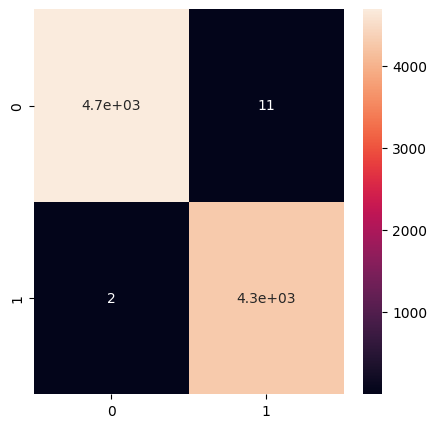

In [55]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True)

In [54]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}

# CONGRATULATIONS!

MINI CHALLENGE #1

In [56]:
# data containing real news
df_true
# data containing fake news
df_fake
# dataframe information
df_true.info()
# dataframe information
df_fake.info()
# check for null values
df_true.isnull().sum()
# check for null values
df_fake.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   isfake   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   isfake   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


,0
title,0
text,0
subject,0
date,0
isfake,0


MINI CHALLENGE #2:
- Perform sanity check on the prepocessing stage by visualizing at least 3 sample news



In [57]:
df['original'][5]
df['clean_joined'][5]

'white house congress prepare talks spending immigration west palm beach washington reuters white house said friday kick talks week republican democratic congressional leaders immigration policy government spending issues need wrapped early year expected flurry legislative activity comes republicans democrats begin stage midterm congressional elections november president donald trump republican party eager maintain control congress democrats look openings wrest seats away senate house representatives wednesday trump budget chief mick mulvaney legislative affairs director marc short meet senate majority leader mitch mcconnell house speaker paul ryan republicans democratic counterparts senator chuck schumer representative nancy pelosi white house said followed weekend strategy sessions trump mcconnell ryan camp david presidential retreat maryland according white house senate returns work house congress passed short term government funding week taking christmas break needs come agreement 

MINI CHALLENGE #3:
- Plot the count plot for fake vs. real news

<Axes: xlabel='count', ylabel='isfake'>

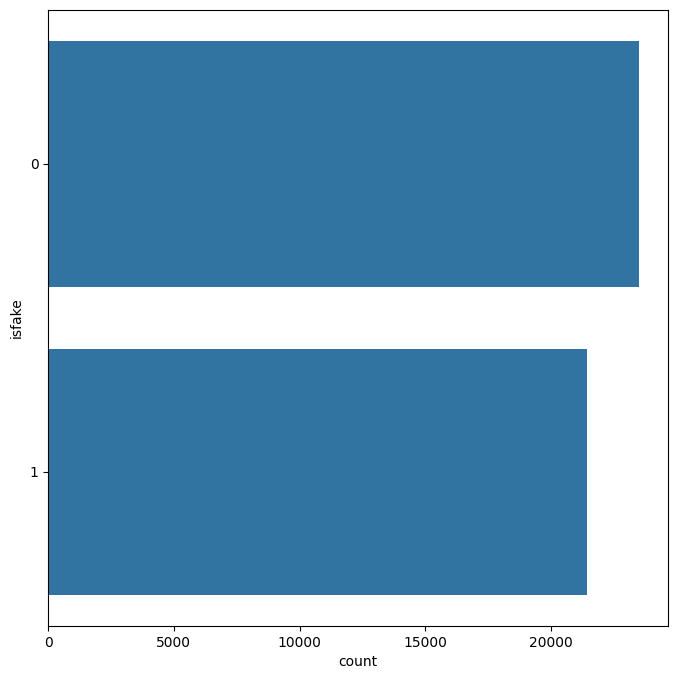

In [58]:
# plot the number of samples per each class
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

MINI CHALLENGE #4:
- Change the embedding output dimension and print out the model summary
- How many trainable parameters are there?

In [ ]:
# Change the embedding size to 240 for example and print out the summary